<a href="https://colab.research.google.com/github/msfancypants07/Computer-Vision-Projects/blob/projects/Copy_of_Advanced_edge_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Start with our usual setup, including the utility methods from last time.

In [2]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from time import time
import cv2

# Make matplotlib figures appear inline in the
# notebook rather than in a new window
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

def display(img, title=None):
    # Show image
    plt.figure(figsize = (5,5))
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

First, let's explore the Gaussian kernel.

In [3]:
import cv2
filter = cv2.getGaussianKernel(5, 1)
filter

array([[0.05448868],
       [0.24420134],
       [0.40261995],
       [0.24420134],
       [0.05448868]])

As we might expect, this returns a 1x5 Gaussian kernel, where the standard deviation is 1. We can use two of these kernels to create a 2d filter, or we can use the higher level function GaussianBlur. Let's try that next. We'll compare the output of the Gaussian blur filter to the simple moving average blur filter we learned about earlier.

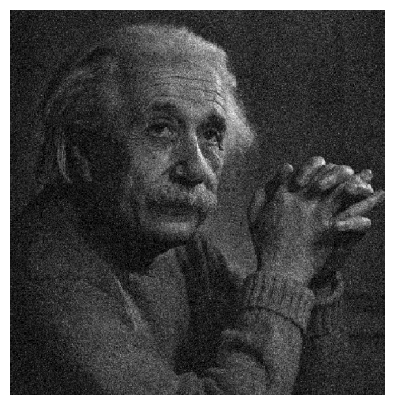

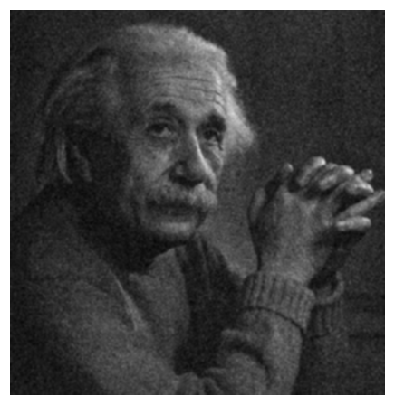

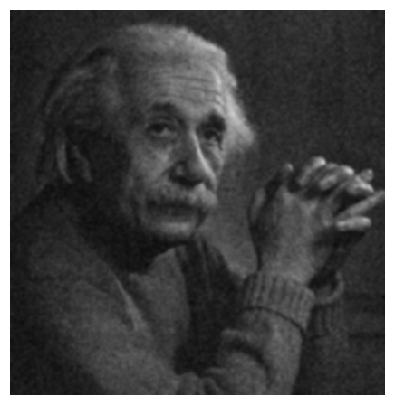

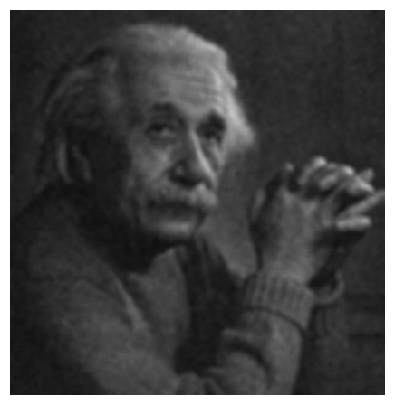

In [4]:
image = cv2.imread('./sample_data/noisy_einstein.png')
display(image)

blur_image = cv2.GaussianBlur(image, (5,5), 0)
blur_image2 = cv2.GaussianBlur(image, (7,7), 0)
blur_image3 = cv2.GaussianBlur(image, (7,7), 5)

display(blur_image)
display(blur_image2)
display(blur_image3)

simple_blur_filter = np.array(
[
    [.11,.11,.11],
    [.11,.11,.11],
    [.11,.11,.11],
])
# simple_blur_image = cv2.filter2D(image, -1, simple_blur_filter)
# display(simple_blur_image)


# Exercise 1

Recall from lecture that the two parameters to Gaussian blur are kernel size and sigma. How do changing these parameters affect the output of the blur filter? You may want to find a different example image to illustrate your point.

In [5]:
# YOUR CODE HERE
# see different images above

sigma determines how much to blur by, while kernel size determines the window size the filter is being applied to

Next, let's look at the thresholding parameters.

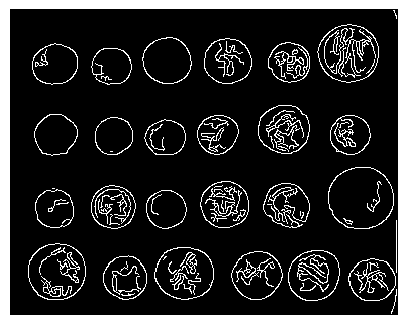

In [6]:
from skimage import feature, data

image = data.coins()
edge_image = feature.canny(image, sigma=1, low_threshold=35, high_threshold=130)
display(edge_image)

# Exercise 2

For each of the following questions, provide sample output that demonstrates your answer. You may need to use a different image.

1. Play with the thresholds to get different output. How does changing each threshold affect the edges that the algorithm finds?
2. Imagine that you have an image with lots of false positives: that is, it finds lots of edges that aren't actually edges. How would you adjust thresholds to improve the result?
3. Imagine that you have an image where the edges don't connect well: that is, it finds some edges, but the edges tend to be broken lines instead of solid lines. How would you adjust thresholds to improve the result?



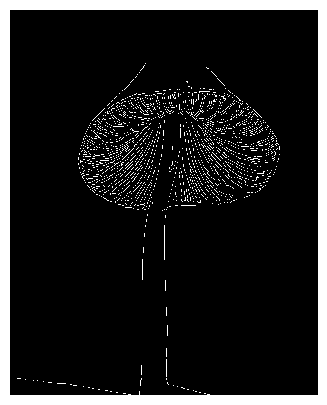

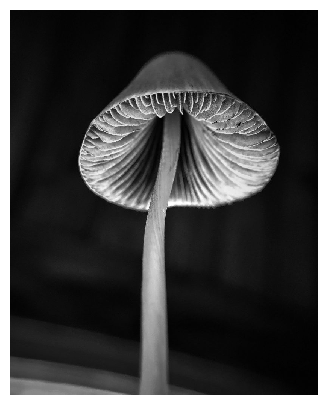

lower:  0
upper:  0


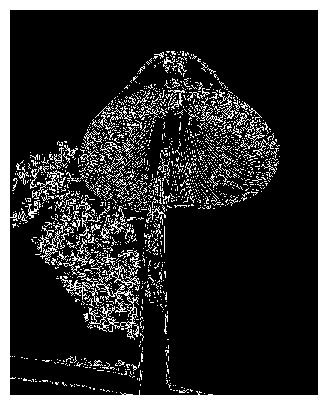

In [7]:
from skimage.color import rgb2gray
mush = cv2.imread('/content/sample_data/musrhoom.jpg')
mushroom = rgb2gray(mush)

edge_mushroom = feature.canny(mushroom, sigma=2, low_threshold=0, high_threshold=0.2)
display(edge_mushroom)

display(mushroom)

# code from https://stackoverflow.com/questions/41893029/opencv-canny-edge-detection-not-working-properly
v = np.median(mushroom)
sigma = 0.33
#---- apply automatic Canny edge detection using the computed median----
lower = int(max(0, (1.0 - sigma) * v))
print('lower: ', lower)
upper = int(min(255, (1.0 + sigma) * v))
print('upper: ', upper)
edged = feature.canny(mushroom, lower, upper)
display(edged)

# 2. I would ajust the high_threshold to only pick up on really really emphasized lines
# 3. I could increase the sigma to increase the blur, and therefore some of the disconnect may be more connected


# Exercise 3
1. Remember from exercise 1 that the two parameters to the Gaussian blur are kernel size and sigma, and that both affect the output of the blur filter. Notice that skimage's canny implementation only takes sigma as a parameter. Without modifying the source code or rewriting the implementation, how might you incorporate a different kernel size?
2. Try to improve the edges you find on data.coins() by tweaking the parameters.
3. Try running the edge detector on some different images. skimage.data has a good set to start with. You can also look at [Berkeley's collection of benchmark images](https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/segbench/). Take notes on which images Canny performs well on, and which it does not.



# Hough Transform

In this exercise, we'll explore how edge detection and line-finding can be used to implement part of a self-driving car algorithm.

We'll start with the steps we covered in lecture: find the edges and then find the lines.

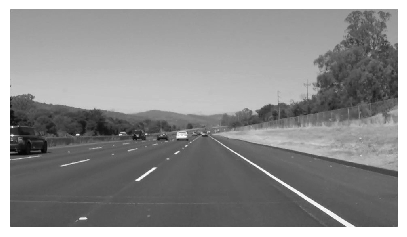

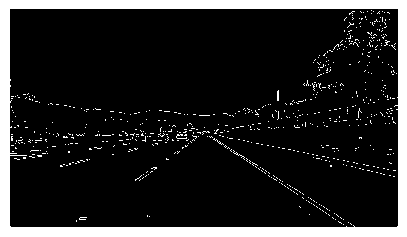

In [8]:
image = cv2.imread('./sample_data/road.jpg', flags=cv2.IMREAD_GRAYSCALE)

display(image)
edge_image = feature.canny(image, sigma=1, low_threshold=60, high_threshold=65)
display(edge_image)

We'll use the probabilistic hough transform function, as it's a bit easier to work with.

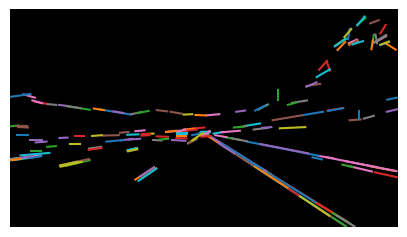

In [9]:
from skimage.transform import probabilistic_hough_line

# Line finding using the Probabilistic Hough Transform
lines = probabilistic_hough_line(edge_image, threshold=1, line_length=20,
                                 line_gap=5)

plt.figure(figsize = (5,5))
plt.imshow(edge_image * 0)
plt.axis('off')
for line in lines:
    p0, p1 = line
    plt.plot((p0[0], p1[0]), (p0[1], p1[1]))


# Exercise 4

1. We've found some lines. Lots of them, in fact. Using only the techniques we've learned so far, how can we clean up this image to only show the lines that correspond to lanes? Optional: implement some of them and show the improvement in the produced image.

2. We can also use additional information that we have about the image; namely, we know that our images are always coming from a camera mounted on the front of the car. How could we use this information to improve on our lane-finding algorithm? Optional: implement your suggestion and show the improvement in the produced image.

3. A video is just a series of images (usually 30 images per second). Imagine that your lane-finding algorithm is being fed a video from a front-mounted camera. Describe how you would use your lane-finding algorithm to keep the car driving straight and in its lane.

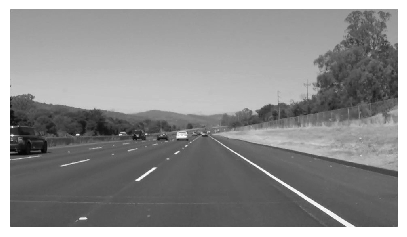

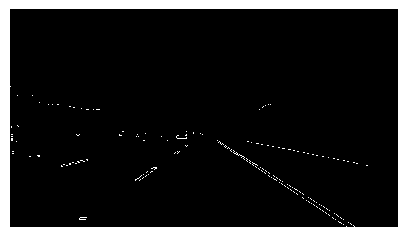

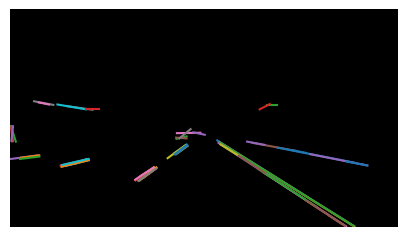

In [10]:
# 1.
# can adjust the probabilistic_hough_line to have a longer line_length threshold
# and larger line_gap threshold


display(image)
road_edge2 = feature.canny(image, sigma=1, low_threshold=195, high_threshold=200)
display(road_edge2)

# then apply hough transform
lines = probabilistic_hough_line(road_edge2, threshold=5, line_length=25,
                                 line_gap=20)

plt.figure(figsize = (5,5))
plt.imshow(edge_image * 0)
plt.axis('off')
for line in lines:
    p0, p1 = line
    plt.plot((p0[0], p1[0]), (p0[1], p1[1]))

# 2.
# know that the lanes will always be facing a vanishing point in front
# have algorithm only apply to lines below vanishing point?

# 3. want the lanes to always be pointing towards the center vanishing point,
# so establish a 'center' position and if the lines change from that position,
# find where it changed and rotate the car back so the lanes match the original positon?

# Exercise 5

Implement your own Canny edge detector. You can use library functions if you like, or implement everything from scratch.

In [43]:
# https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123
# https://www.geeksforgeeks.org/implement-canny-edge-detector-in-python-using-opencv/

from google.colab.patches import cv2_imshow

def my_canny(img, min_threshold=None, max_threshold=None):

  # Noise reduction using Gaussian filter
  img_blur = cv2.GaussianBlur(img, (5,5), 0)

  # Gradient calculation along the horizontal and vertical axis
  # https://learnopencv.com/edge-detection-using-opencv/
  sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)

  display(sobelxy)
  # Non-Maximum suppression of false edges

  # Double thresholding for segregating strong and weak edges

  x, y = img.shape
  new = np.zeros((x, y), dtype=np.float32)

  weak_i, weak_j = np.where(img < min_threshold)
  strong_i, strong_j = np.where(img > max_threshold)
  medium_i, medium_j = np.where((img > min_threshold) & (img < max_threshold))


  max = cv2.inRange(sobelxy, min_threshold, max_threshold)

  strong = np.int32(255)
  weak = np.int32(50)
  new[strong_i, strong_j] = strong
  new[medium_i, medium_j] = weak

  return display(new, weak, strong)
  # display(max)
  # Edge tracking by hysteresis

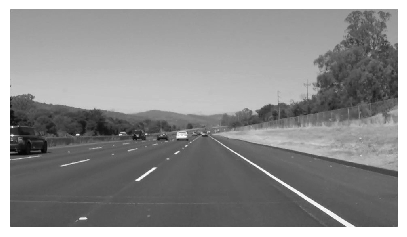

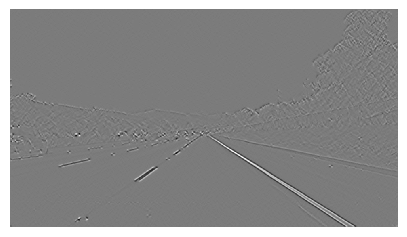

TypeError: ignored

In [44]:
display(image)
test = my_canny(image, 70, 80)